In [69]:
#Importing Packages 
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn.metrics import explained_variance_score
rcParams['figure.figsize'] = 15, 5

In [70]:
#import stock data
yahoo_data = pd.read_csv('C:/Users/LTD/Desktop/Git/Yahoo stock prices/stock_data.csv')
yahoo_data.head()

,Date,Open,High,Low,Close,adjusted_close,Volume,Year,Month,Day
0,1/4/2016,23.850000,23.850000,23.240000,23.430000,22.868193,93200,2016,1,4
1,1/5/2016,23.420000,23.610001,23.070000,23.490000,22.926754,131100,2016,1,5
2,1/6/2016,23.250000,23.450001,23.170000,23.370001,22.809633,51300,2016,1,6
3,1/7/2016,22.959999,23.209999,22.559999,22.820000,22.272820,75600,2016,1,7
4,1/8/2016,22.910000,23.110001,22.420000,22.590000,22.048336,121000,2016,1,8


In [71]:
yahoo_data['Date'] =pd.to_datetime(yahoo_data.Date)
df=yahoo_data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Close,adjusted_close,Volume,Year,Month,Day
0,2016-01-04,23.850000,23.850000,23.240000,23.430000,22.868193,93200,2016,1,4
1,2016-01-05,23.420000,23.610001,23.070000,23.490000,22.926754,131100,2016,1,5
2,2016-01-06,23.250000,23.450001,23.170000,23.370001,22.809633,51300,2016,1,6
3,2016-01-07,22.959999,23.209999,22.559999,22.820000,22.272820,75600,2016,1,7
4,2016-01-08,22.910000,23.110001,22.420000,22.590000,22.048336,121000,2016,1,8


In [88]:
thresh=df.Date[df.Date == '2016-10-03'].index.tolist()
data_train = df[:thresh[0]]
data_test = df[thresh[0]+1:]

,Date,Open,High,Low,Close,adjusted_close,Volume,Year,Month,Day
190,2016-10-04,23.620001,23.760000,23.389999,23.580000,23.116068,76400,2016,10,4
191,2016-10-05,23.590000,23.680000,23.320000,23.459999,22.998428,29900,2016,10,5
192,2016-10-06,23.360001,23.480000,23.290001,23.420000,22.959215,31000,2016,10,6
193,2016-10-07,23.150000,23.350000,23.059999,23.209999,22.753345,59000,2016,10,7
194,2016-10-10,23.370001,23.530001,23.370001,23.469999,23.008230,37900,2016,10,10
195,2016-10-11,23.389999,23.469999,23.110001,23.270000,22.812170,58400,2016,10,11
196,2016-10-12,23.309999,23.570000,23.190001,23.469999,23.008230,45500,2016,10,12
197,2016-10-13,23.340000,23.660000,23.219999,23.379999,22.920002,47600,2016,10,13
198,2016-10-14,23.430000,23.690001,23.270000,23.559999,23.096460,68000,2016,10,14
199,2016-10-17,23.570000,24.160000,23.559999,23.900000,23.429773,130400,2016,10,17


Text(0.5,1,'Yahoo Adjusted closing rate - Year 2016')

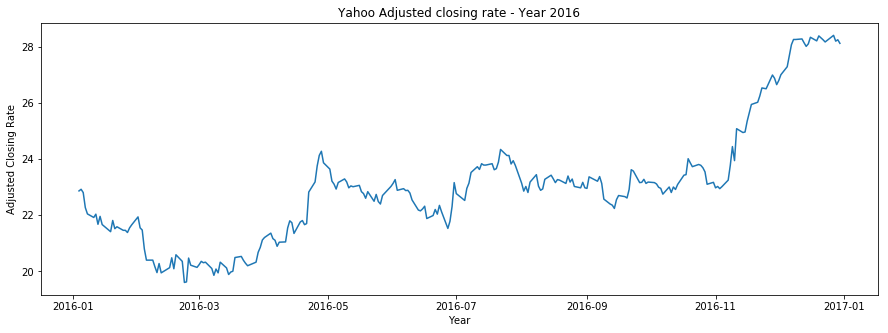

In [92]:
plt.plot(df.Date, df['adjusted_close'])
plt.xlabel('Year')
plt.ylabel('Adjusted Closing Rate')
plt.title('Yahoo Adjusted closing rate - Year 2016')

In [49]:
#Method to Evaluate If a Time Series Object Is Stationary
def evaluate_stationarity(timeseries, t=30):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=t).mean()
    rolstd = timeseries.rolling(window=t).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

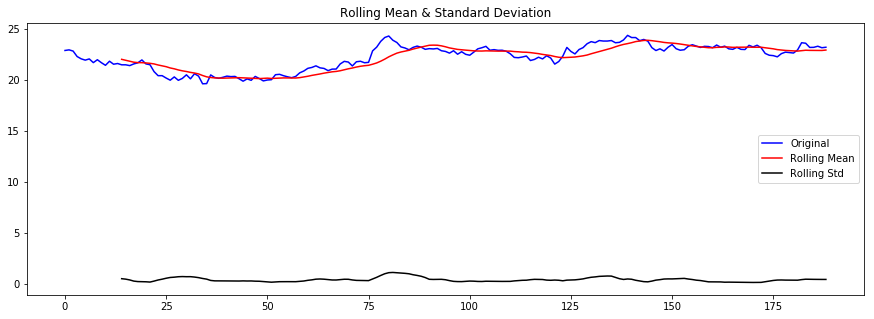

Results of Dickey-Fuller Test:
Test Statistic                  -1.544553
p-value                          0.511368
#Lags Used                       0.000000
Number of Observations Used    188.000000
Critical Value (1%)             -3.465620
Critical Value (5%)             -2.877040
Critical Value (10%)            -2.575032
dtype: float64


In [93]:
evaluate_stationarity(data_train['adjusted_close'], 15)

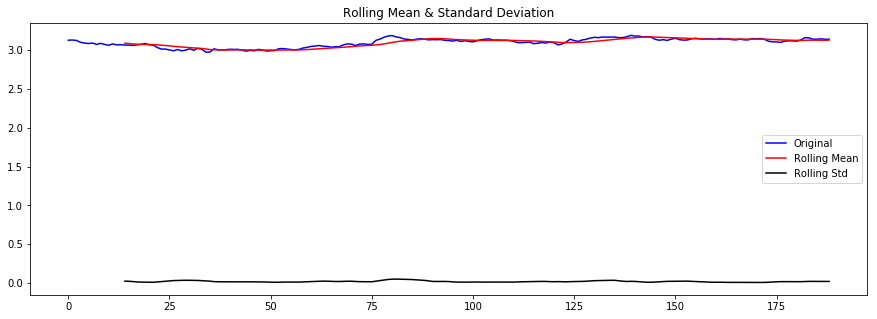

Results of Dickey-Fuller Test:
Test Statistic                  -1.537302
p-value                          0.514985
#Lags Used                       0.000000
Number of Observations Used    188.000000
Critical Value (1%)             -3.465620
Critical Value (5%)             -2.877040
Critical Value (10%)            -2.575032
dtype: float64


In [94]:
#Applying Log Transformation to Time Series Object
data_log = np.log(data_train['adjusted_close'])
evaluate_stationarity(data_log, 15)

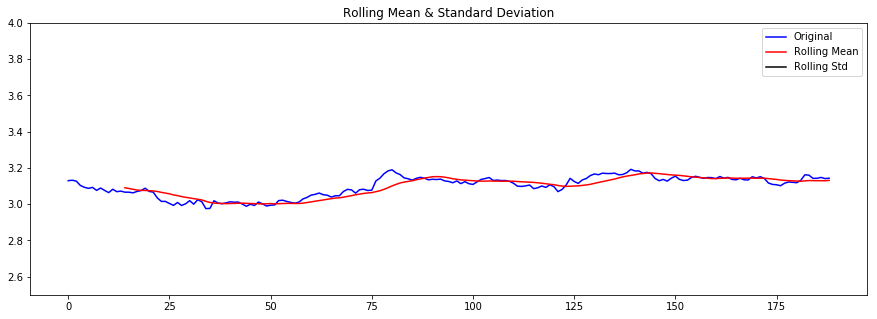

In [98]:
#Zooomed Figure of Rolling Mean from a Log Transformed Distribution
data_log = np.log(data_train['adjusted_close'])
#Determing rolling statistics
rolmean = data_log.rolling(window=15).mean()
rolstd = data_log.rolling(window=15).std()
#Plot rolling statistics:
orig = plt.plot(data_log, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.ylim([2.5,4])
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

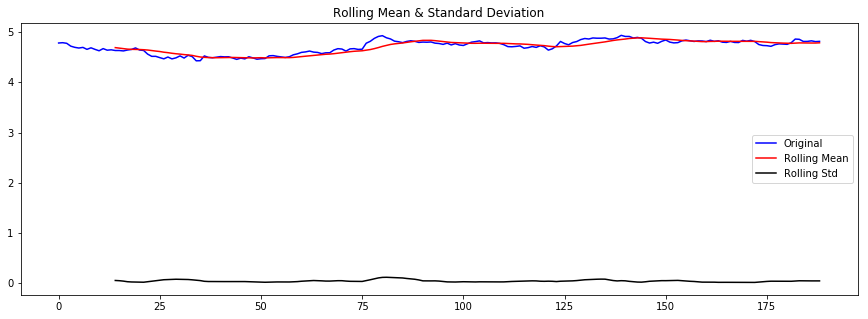

Results of Dickey-Fuller Test:
Test Statistic                  -1.540094
p-value                          0.513592
#Lags Used                       0.000000
Number of Observations Used    188.000000
Critical Value (1%)             -3.465620
Critical Value (5%)             -2.877040
Critical Value (10%)            -2.575032
dtype: float64


In [100]:
# Applying Sqrt Transformation to Time Series Object
data_sqrt = np.sqrt(data_train['adjusted_close'])
evaluate_stationarity(data_sqrt, 15)

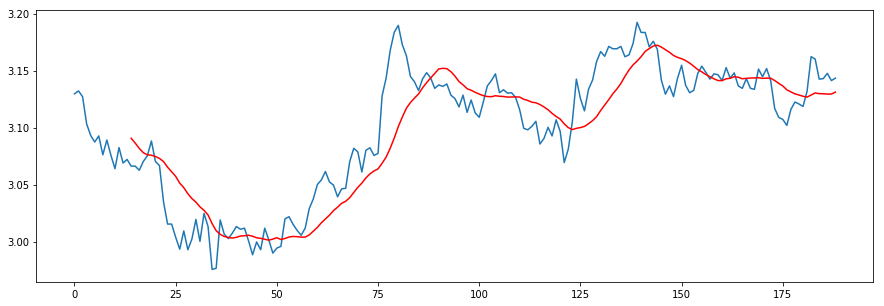

In [104]:
#Applying Moving Average Smoothing to the Time Series Object
moving_avg = data_log.rolling(15).mean()
plt.plot(data_log)
plt.plot(moving_avg, color='red')

In [105]:
#Printing Trendless Time Series Object
data_log_moving_avg_diff = data_log - moving_avg
data_log_moving_avg_diff.head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14   -0.024456
Name: adjusted_close, dtype: float64

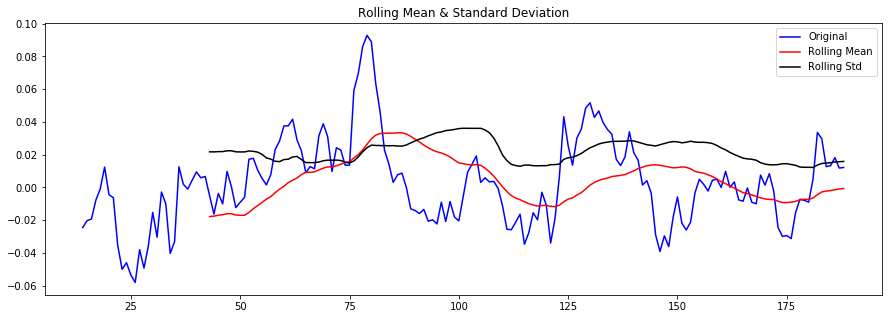

Results of Dickey-Fuller Test:
Test Statistic                  -3.698079
p-value                          0.004140
#Lags Used                       1.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64


In [106]:
#Evaluating Trendless Time Series for Stationary
data_log_moving_avg_diff.dropna(inplace=True)
evaluate_stationarity(data_log_moving_avg_diff)

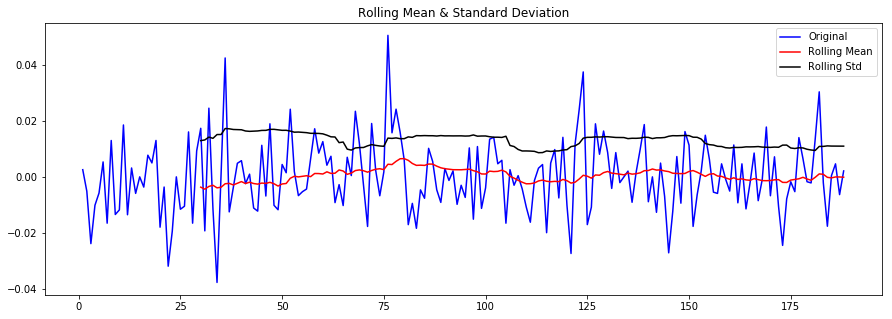

Results of Dickey-Fuller Test:
Test Statistic                -1.017815e+01
p-value                        6.805548e-18
#Lags Used                     1.000000e+00
Number of Observations Used    1.860000e+02
Critical Value (1%)           -3.466005e+00
Critical Value (5%)           -2.877208e+00
Critical Value (10%)          -2.575122e+00
dtype: float64


In [113]:
#Applying First-Order Differencing to the Log Version of the Time Series Object
data_log_diff = data_log - data_log.shift()
data_log_diff.dropna(inplace=True)
evaluate_stationarity(data_log_diff)

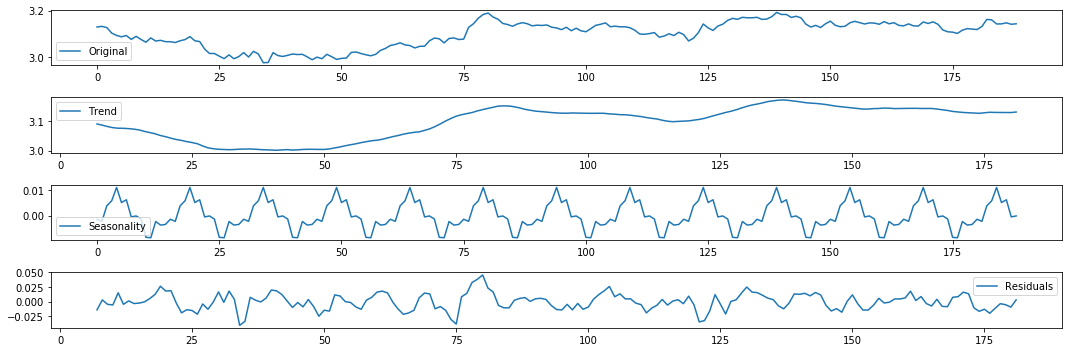

In [115]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(list(data_log), freq=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

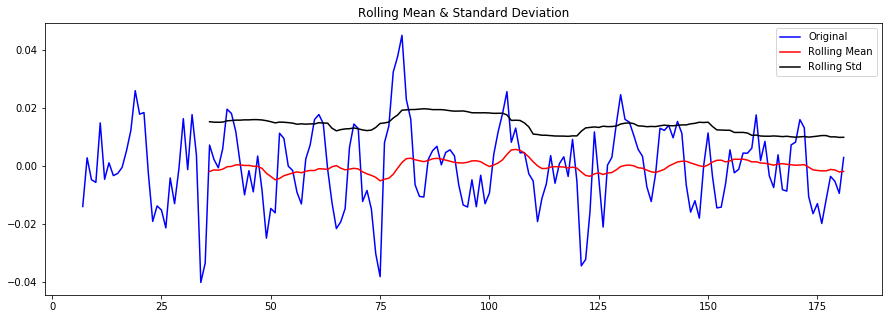

Results of Dickey-Fuller Test:
Test Statistic                  -5.171435
p-value                          0.000010
#Lags Used                      12.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64


In [116]:
#Evaluating the Residuals for Stationary
data_log_decompose = pd.Series(residual)
data_log_decompose.dropna(inplace=True)
evaluate_stationarity(data_log_decompose)

In [117]:
# Calculating the Durbin Watson Statistics for Log Transformed Differencing Applied Time Series
sm.stats.durbin_watson(data_log_diff)

1.897020987208473

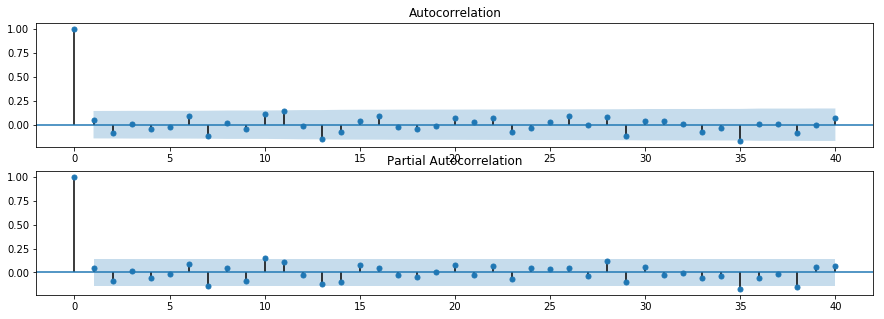

In [120]:
#Plotting Correlograms for ACF and PACF on Log Transformed Differencing Applied Time Series
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(data_log_diff.squeeze(), lags=40, ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_log_diff, lags=40, ax=ax2)

Text(0.5,1,'RSS: 0.0314')

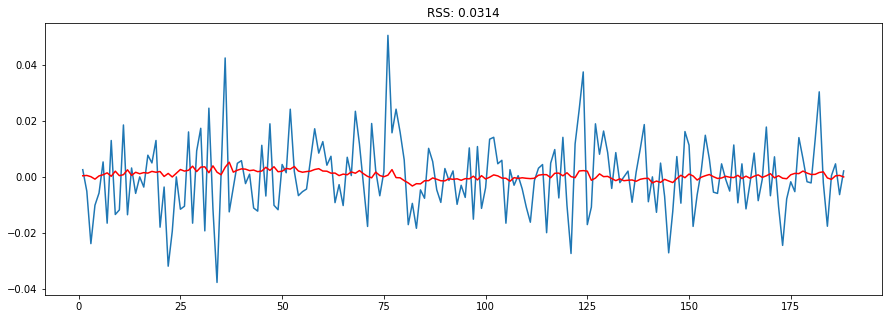

In [162]:
#Applying Combined Model to Log Transformed Differencing Applied Time Series
model = ARIMA(data_log, order=(2, 1, 1))
results_ARIMA_211 = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_ARIMA_212.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA_111.fittedvalues-data_log_diff)**2))

In [163]:
#Printing First Few Observations of the Forecasted Series
predictions_ARIMA_diff = pd.Series(results_ARIMA_211.fittedvalues,copy=True)
print (predictions_ARIMA_diff.head())

1    0.000390
2    0.000502
3    0.000060
4   -0.000814
5    0.000341
dtype: float64


In [164]:
#Printing Cumulative Sum of the Forecasted Series
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())


1    0.000390
2    0.000892
3    0.000952
4    0.000138
5    0.000479
dtype: float64


In [165]:
#Printing AIC scores of the Forecasted Series
print (results_ARIMA_211.aic)

-1090.920335484552


In [166]:
#Printing Differencing Removed Forecasted Time Series
predictions_ARIMA_log = pd.Series(data_log.iloc[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

0    3.129747
1    3.130137
2    3.130639
3    3.130699
4    3.129885
dtype: float64

Text(0.5,1,'RMSE: 3.0479 | MFE: -2.8144 | MAE: 11.2641')

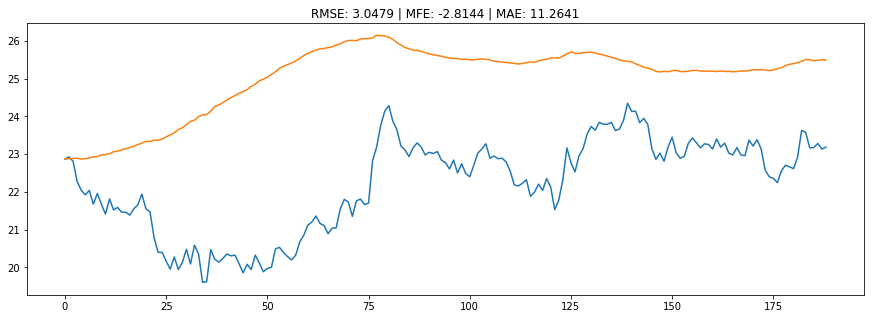

In [167]:
#Evaluating the Forecasted Series vs. the Original One
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat))*100 # or

def rmse(y, yhat):
    return np.sqrt(sum((yhat-y)**2)/len(y))

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data_train['adjusted_close'])
plt.plot(predictions_ARIMA)

plt.title('RMSE: %.4f | MFE: %.4f | MAE: %.4f'% (
rmse(data_train['adjusted_close'], predictions_ARIMA), mean_forecast_err(data_train['adjusted_close'], predictions_ARIMA), mean_absolute_err(data_train['adjusted_close'], predictions_ARIMA)))

Text(0,0.5,'Adjusted CLose')

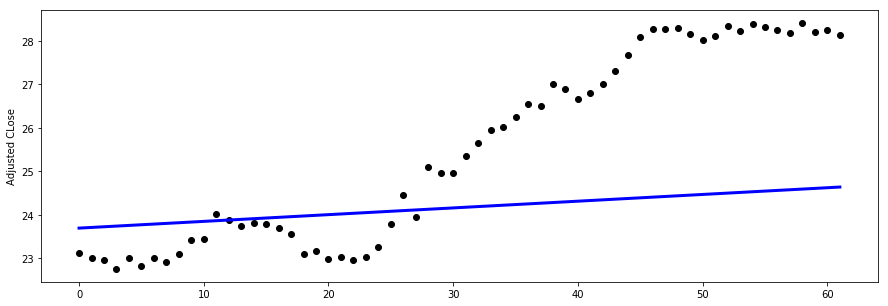

In [181]:
#Predicting and Evaluating Future Time Series Using a Linear Regression Model
regr = LinearRegression()
x_train = [[x] for x in range(len(data_train))]
y_train = [[y] for y in list(data_train['adjusted_close'])]
regr.fit(x_train, y_train)
x_test = [[z] for z in list(data_test.index)]
y_pred=regr.predict(x_test)
explained_variance_score(data_test['adjusted_close'], y_pred)
plt.scatter(range(len(data_test)), data_test['adjusted_close'], color='black')
plt.plot(range(len(data_test)), y_pred, color='blue',
linewidth=3)
plt.ylabel('Adjusted CLose')